## Analyzing Car Resale Market Trends: Pricing, Reliability, Features, and Popularity Insights

### Data Access

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import time

In [16]:
df = pd.read_csv('CarData.csv')

In [17]:
print(df.dtypes)

brand                           object
model                           object
year                           float64
mileage                        float64
engine                          object
engine_size                    float64
transmission                    object
automatic_transmission         float64
fuel_type                       object
drivetrain                      object
min_mpg                        float64
max_mpg                        float64
damaged                        float64
first_owner                    float64
personal_using                 float64
turbo                          float64
alloy_wheels                   float64
adaptive_cruise_control        float64
navigation_system              float64
power_liftgate                 float64
backup_camera                  float64
keyless_start                  float64
remote_start                   float64
sunroof/moonroof               float64
automatic_emergency_braking    float64
stability_control        

In [18]:
#switching "price" column from string to float
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype(float)

### Removal of Unnecessary Columns

In [20]:
df.drop(columns=['personal_using','alloy_wheels', 'damaged', 'third_row_seating', 'first_owner', 'interior_color', 'exterior_color'], inplace = True)

### Negative Value Check

In [22]:
num_cols = ['price', 'min_mpg', 'max_mpg', 'engine_size', 'mileage']

for column in num_cols:
    negative_rows = df[df[column] < 0]
    if len(negative_rows) > 0:
        print(f"Found {len(negative_rows)} negative values in {column}")
        df = df[df[column] >= 0]
    else:
        print(f"No negative values in {column}")

No negative values in price
No negative values in min_mpg
No negative values in max_mpg
No negative values in engine_size
No negative values in mileage


### Null and Duplicate Check & Removal

In [24]:
df.isnull().sum().sum()

1835

In [25]:
df = df.dropna(subset=['engine_size', 'transmission', 'price']).reset_index(drop=True)

In [26]:
# Fill missing min_mpg and max_mpg with their mean values
df['min_mpg'] = df['min_mpg'].fillna(df['min_mpg'].mean())
df['max_mpg'] = df['max_mpg'].fillna(df['max_mpg'].mean())

In [27]:
df.duplicated().sum()

0

In [28]:
# Re-check for nulls
df.isnull().sum().sum()

0

### Outlier Check in Numerical Columns

#### Price

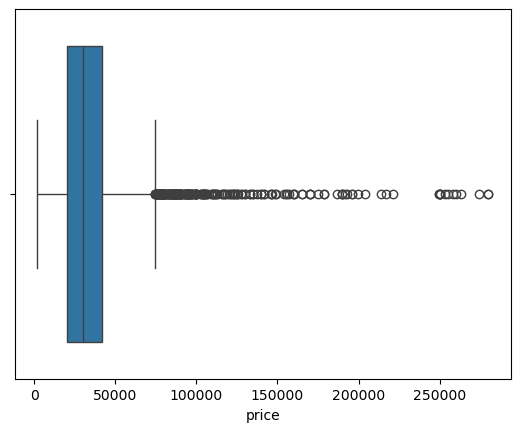

In [31]:
sns.boxplot(x='price', data=df)
plt.show()

#### Min MPG

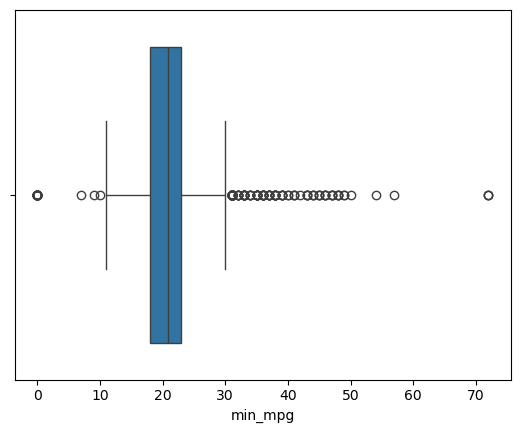

In [33]:
sns.boxplot(x='min_mpg', data=df)
plt.show()

In [34]:
# Calculate Q1, Q3, and IQR for engine_size
Q1 = df['min_mpg'].quantile(0.25)
Q3 = df['min_mpg'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['min_mpg'] >= lower_bound) & (df['min_mpg'] <= upper_bound)]

print("Outliers in min_mpg removed.")

Outliers in min_mpg removed.


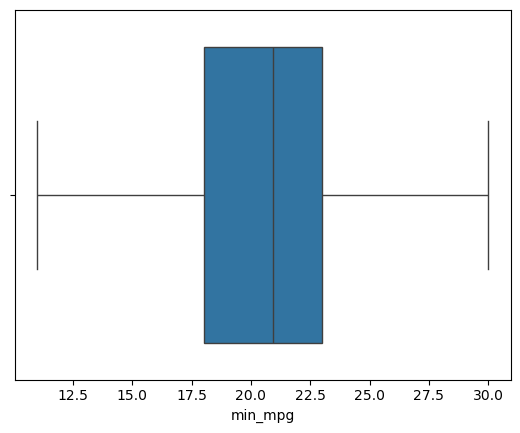

In [35]:
sns.boxplot(x='min_mpg', data=df)
plt.show()

#### Max MPG

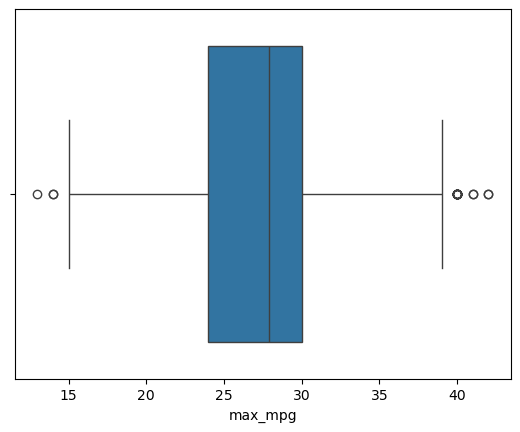

In [37]:
sns.boxplot(x='max_mpg', data=df)
plt.show()

In [38]:
# Calculate Q1, Q3, and IQR for engine_size
Q1 = df['max_mpg'].quantile(0.25)
Q3 = df['max_mpg'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['max_mpg'] >= lower_bound) & (df['max_mpg'] <= upper_bound)]

print("Outliers in max_mpg removed.")

Outliers in max_mpg removed.


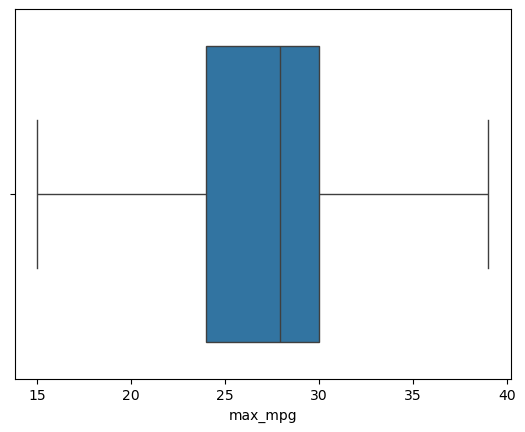

In [39]:
sns.boxplot(x='max_mpg', data=df)
plt.show()

#### Engine Size

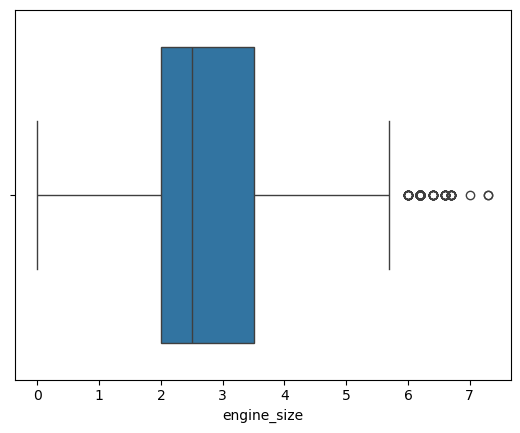

In [41]:
sns.boxplot(x='engine_size', data=df)
plt.show()

In [42]:
# Calculate Q1, Q3, and IQR for engine_size
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['engine_size'] >= lower_bound) & (df['engine_size'] <= upper_bound)]

print("Outliers in engine_size removed.")

Outliers in engine_size removed.


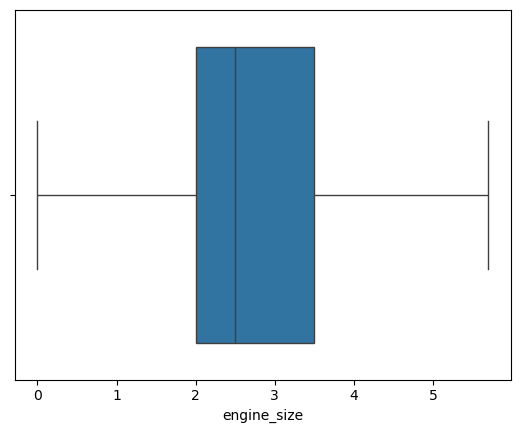

In [43]:
sns.boxplot(x='engine_size', data=df)
plt.show()

#### Mileage

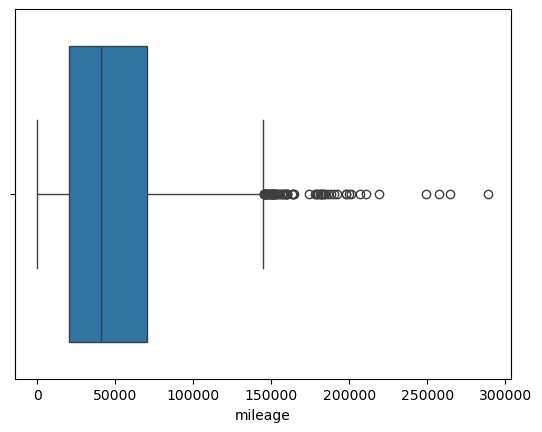

In [45]:
sns.boxplot(x='mileage', data=df)
plt.show()

### Data Preparation

In [47]:
# create avg_mpg column
df['avg_mpg'] = df[['min_mpg', 'max_mpg']].mean(axis=1)
#Average price per brand:
avg_price_per_brand = df.groupby('brand')['price'].mean().reset_index()
#Average mileage by drivetrain:
avg_mileage = df.groupby('drivetrain')['mileage'].mean().reset_index()
# Create 'car_age' column
df['car_age'] = 2025 - df['year']

### Web Scraping

In [230]:
def get_reliability_rating(year, make, model):
    url = f"https://www.jdpower.com/cars/{year}/{make}/{model}"

    try:
        driver.get(url)

        print("Waiting for reliability rating element...")
        rating_element = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((
                By.CSS_SELECTOR, '#ae-main-content > div > div.MuiGrid-root.MuiGrid-item.MuiGrid-grid-xs-12.MuiGrid-grid-sm-6.MuiGrid-grid-md-8.full-width-print.mui-ow6zb1 > div.consumerRating_consumer-rating__gfuK_ > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.mui-17sgfc9 > div:nth-child(1) > div.radial-chart.radialBar_radial-chart__V0L0j.undefined.undefined.mui-1rkldq8.MuiBox-root.mui-68zbsl > div > div > div.radialBar_small-rating-value__u9ifJ.jdp-radial-bar-small-rating-value > span.bh-m'))
        )
        rating = rating_element.text.strip()
        print(f"Reliability Rating for {model.capitalize()}: {rating} out of 100")
        return rating
    except Exception as e:
        print(f"Error retrieving data for {make.capitalize()} {model.capitalize()} ({year}): {e}")
        return None


In [202]:
def scrape_reliability_ratings(df):
    reliability_ratings = {}

    for _, row in df[['year', 'brand', 'model']].drop_duplicates().iterrows():
        year, make, model = int(row['year']), row['brand'].strip().lower(), row['model'].strip().lower()
        key = (year, make, model)

        if key not in reliability_ratings:
            reliability_ratings[key] = get_reliability_rating(year, make, model)

    df['reliability_rating'] = df.apply(lambda row: reliability_ratings.get((row['year'], row['brand'].strip().lower(), row['model'].strip().lower()), None), axis=1)

    print("All reliability ratings added to the DataFrame.")
    return df 

In [232]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
options.add_argument("--disable-images")
options.add_argument("--disable-extensions")
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
options.page_load_strategy = 'eager'

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

df = scrape_reliability_ratings(df)

df.to_csv('CarData_withScraped.csv', index=False)

driver.quit()

Waiting for reliability rating element...
Error retrieving data for Fiat 124 spider lusso (2020): Message: 
Stacktrace:
	GetHandleVerifier [0x0127D363+60275]
	GetHandleVerifier [0x0127D3A4+60340]
	(No symbol) [0x010B06F3]
	(No symbol) [0x010F8690]
	(No symbol) [0x010F8A2B]
	(No symbol) [0x01140EE2]
	(No symbol) [0x0111D0D4]
	(No symbol) [0x0113E6EB]
	(No symbol) [0x0111CE86]
	(No symbol) [0x010EC623]
	(No symbol) [0x010ED474]
	GetHandleVerifier [0x014C8FE3+2467827]
	GetHandleVerifier [0x014C45E6+2448886]
	GetHandleVerifier [0x014DF80C+2560028]
	GetHandleVerifier [0x01293DF5+153093]
	GetHandleVerifier [0x0129A3BD+179149]
	GetHandleVerifier [0x01284BB8+91080]
	GetHandleVerifier [0x01284D60+91504]
	GetHandleVerifier [0x0126FA10+4640]
	BaseThreadInitThunk [0x7594FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x771082AE+286]
	RtlGetAppContainerNamedObjectPath [0x7710827E+238]

Waiting for reliability rating element...
Reliability Rating for Rx 450h f sport: 85 out of 100
Waiting for reliabili

### Null and Duplicate Re-check after Scraping

In [72]:
df = pd.read_csv('CarData_withScraped.csv')

In [73]:
df.isnull().sum()

brand                             0
model                             0
year                              0
mileage                           0
engine                            0
engine_size                       0
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                           0
max_mpg                           0
turbo                             0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof/moonroof                  0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                       0
apple_car_play/android_auto       0
bluetooth                         0
usb_port                          0
heated_seats                

#### Handling Missing Reliability Ratings

After scraping the reliability ratings, we noticed that approximately 2133 rows have missing values. Instead of dropping these rows, which could lead to loss of valuable data, we fill the missing values using a more calculated approach. Specifically, we calculate the **average reliability rating per brand** and use this brand-specific average to fill in the missing values.

In [75]:
brand_avg = df.groupby('brand')['reliability_rating'].mean()

def fill(row):
    if pd.isnull(row['reliability_rating']):
        return brand_avg.get(row['brand'], None)
    return row['reliability_rating']

df['reliability_rating'] = df.apply(fill, axis=1)

df['reliability_rating'].isnull().sum()
print(f"Remaining nulls after filling: {df['reliability_rating'].isnull().sum()}")

Remaining nulls after filling: 487


##### Handling Unsuccessfully scraped brands

Remaining nulls were filled with the overall average to retain all records and ensure consistent analysis.

In [77]:
overall_avg = df['reliability_rating'].mean()
df['reliability_rating'] = df['reliability_rating'].fillna(overall_avg)
df['reliability_rating'] = df['reliability_rating'].astype(int)

In [78]:
df.isnull().sum()

brand                          0
model                          0
year                           0
mileage                        0
engine                         0
engine_size                    0
transmission                   0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
min_mpg                        0
max_mpg                        0
turbo                          0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
apple_car_play/android_auto    0
bluetooth                      0
usb_port                       0
heated_seats                   0
price                          0
avg_mpg                        0
car_age   

In [79]:
df.duplicated().sum()

0

### Goals and Insights

#### How do older cars compare in price when they have lower mileage? Is age or mileage more significant in price depreciation?

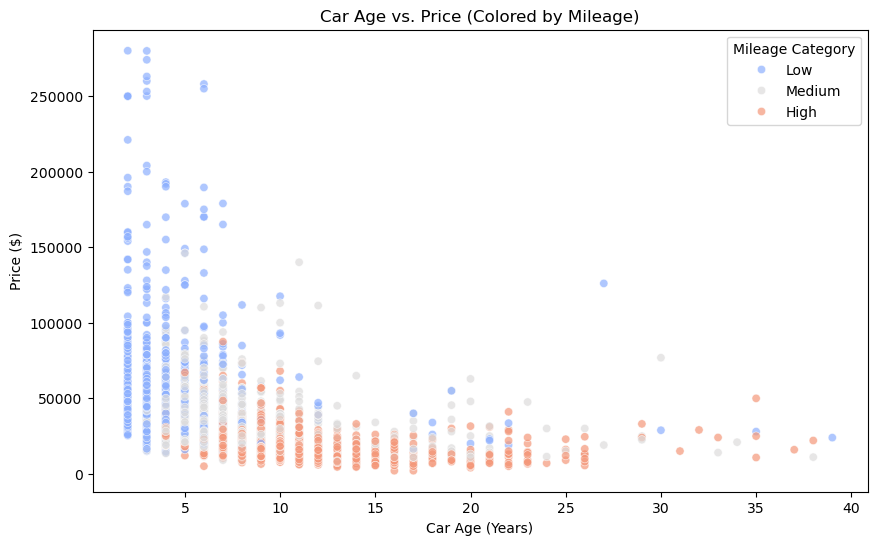

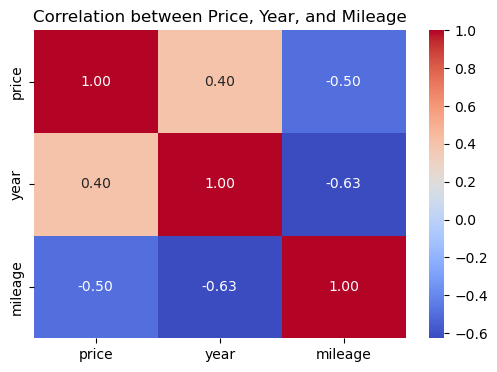

In [82]:
# Categorize mileage into Low, Medium, High
df['mileage_category'] = pd.qcut(df['mileage'], q=3, labels=['Low', 'Medium', 'High'])

# Scatter plot: Car Age vs. Price (Colored by Mileage)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='car_age', y='price', hue='mileage_category', palette='coolwarm', alpha=0.7)
plt.xlabel("Car Age (Years)")
plt.ylabel("Price ($)")
plt.title("Car Age vs. Price (Colored by Mileage)")
plt.legend(title="Mileage Category")
plt.show()

# Using HeatMap to display Correlation between Price, Year, and Mileage
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price', 'year', 'mileage']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price, Year, and Mileage")
plt.show()

Mileage plays a more critical role in determining price differences, especially for older vehicles. Lower mileage helps older cars retain value better than high mileage, even as they age.

#### How does engine size affect fuel efficiency (MPG) across different drivetrain types?

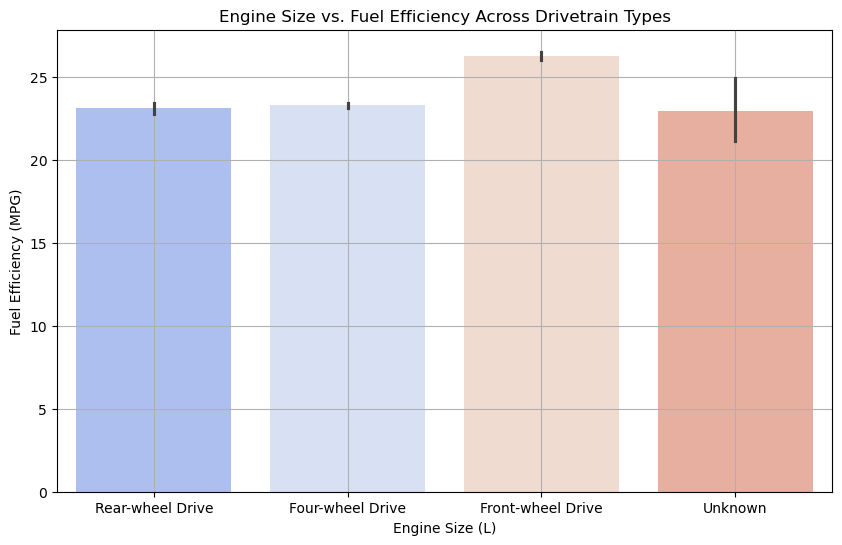

In [85]:
# Engine Size vs. MPG (Color-coded by Drivetrain)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='drivetrain', y='avg_mpg', hue='drivetrain', palette='coolwarm', alpha=0.7)

plt.xlabel("Engine Size (L)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Engine Size vs. Fuel Efficiency Across Drivetrain Types")
plt.grid(True)
plt.show()

Front-Wheel drive cars appear to be more efficient than their Rear-Wheel and Four-Wheel counterparts in equal engine sizes.

#### Are hybrid cars significantly more fuel-efficient than gasoline cars across different brands?

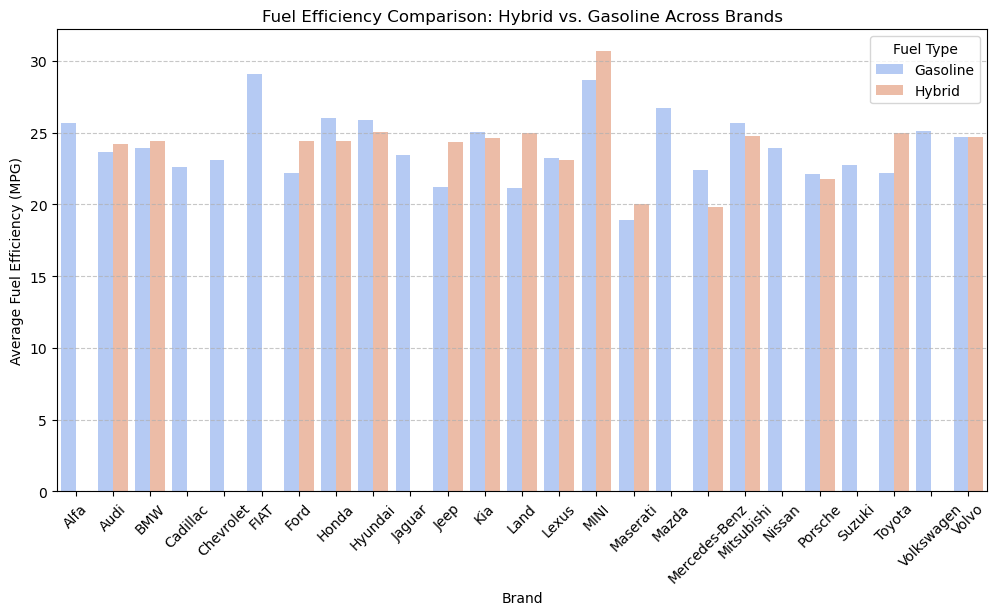

In [88]:
df_filtered = df[df['fuel_type'].isin(['Hybrid', 'Gasoline'])]

# average MPG for each brand & fuel type
mpg_by_brand = df_filtered.groupby(['brand', 'fuel_type'], as_index=False)['avg_mpg'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=mpg_by_brand, x='brand', y='avg_mpg', hue='fuel_type', palette='coolwarm')

plt.xlabel("Brand")
plt.ylabel("Average Fuel Efficiency (MPG)")
plt.title("Fuel Efficiency Comparison: Hybrid vs. Gasoline Across Brands")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hybrid cars shows slightly higher fuel efficiency than gasoline cars across many of the listed brands.

#### Are cars with more safety features (e.g., stability control, emergency braking, backup camera) priced significantly higher than those without?

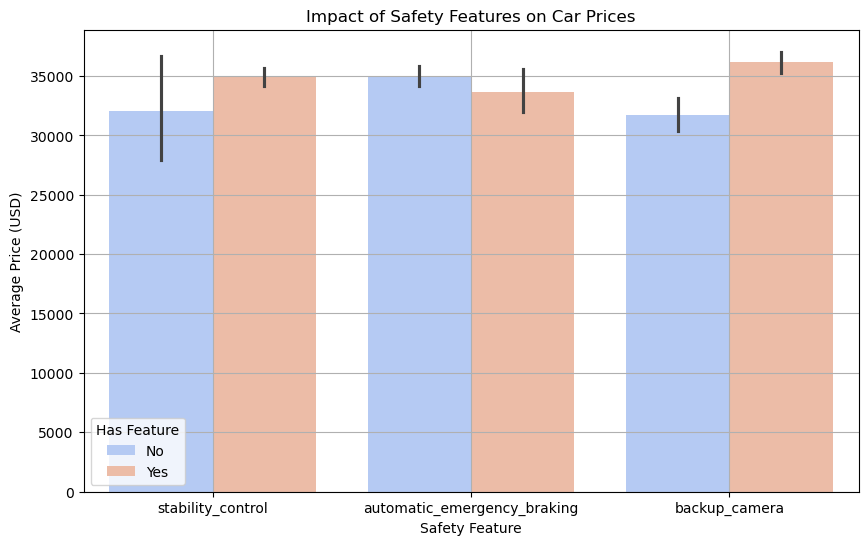

In [91]:
safety_features = ['stability_control', 'automatic_emergency_braking', 'backup_camera']

# Convert boolean safety features to numerical (0/1)
df[safety_features] = df[safety_features].apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x)

# Melt for grouped bar plot
df_melted = df.melt(id_vars=['price'], value_vars=safety_features, var_name='Safety Feature', value_name='Has Feature')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Safety Feature', y='price', hue='Has Feature', palette="coolwarm")

plt.xlabel("Safety Feature")
plt.ylabel("Average Price (USD)")
plt.title("Impact of Safety Features on Car Prices")
plt.grid(True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Has Feature", loc="lower left", frameon=True)

plt.show()

On average, cars with safety features such as Backup Cameras and Stability control cost more.

#### Do Cars with More Luxury Features Have Higher Resale Prices Across Brands

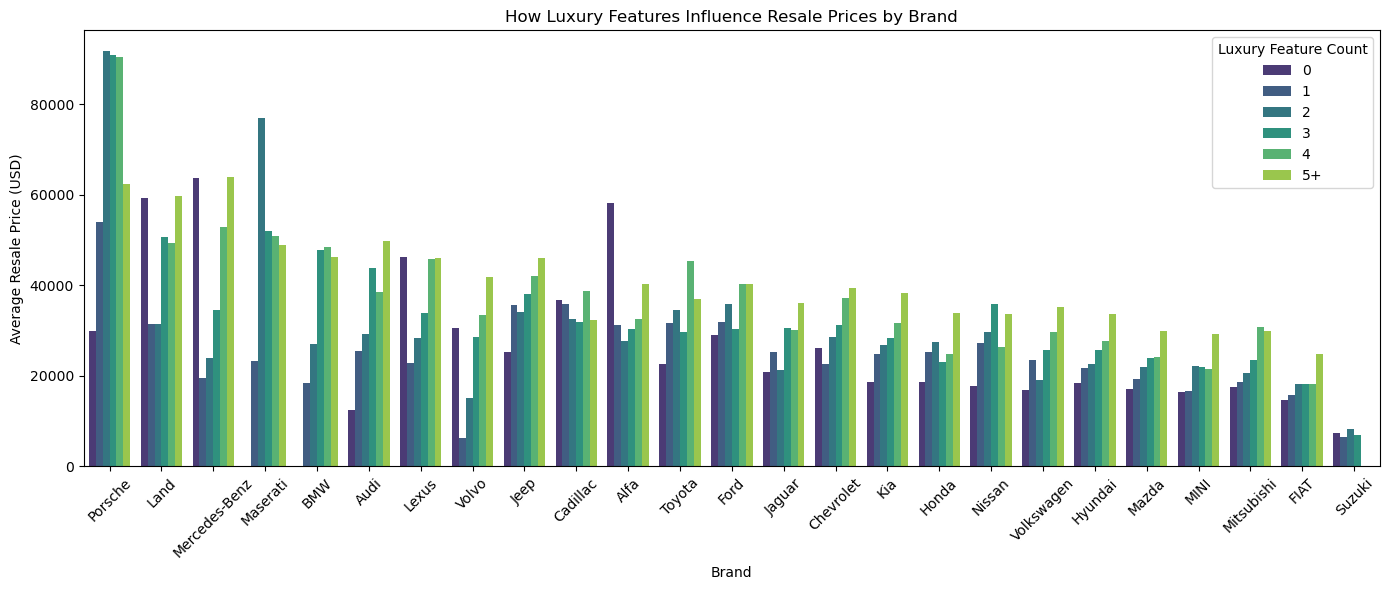

In [94]:
luxury_features = [
    'heated_seats', 'sunroof/moonroof', 'leather_seats', 
    'memory_seat', 'adaptive_cruise_control', 'navigation_system', 'power_liftgate'
]

# Count how many luxury features each car has
df['luxury_feature_count'] = df[luxury_features].sum(axis=1)

# Optional: Bin the feature count to avoid too many hue levels (e.g., group 5+ together)
df['luxury_bin'] = df['luxury_feature_count'].apply(lambda x: str(x) if x < 5 else '5+')

# Calculate average resale price per brand and luxury bin
luxury_price_avg = df.groupby(['brand', 'luxury_bin'])['price'].mean().reset_index()

# Sort brands by overall average resale price
brand_order = df.groupby('brand')['price'].mean().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=luxury_price_avg,
    x='brand',
    y='price',
    hue='luxury_bin',
    palette='viridis',
    order=brand_order
)

plt.xlabel("Brand")
plt.ylabel("Average Resale Price (USD)")
plt.title("How Luxury Features Influence Resale Prices by Brand")
plt.xticks(rotation=45)
plt.legend(title="Luxury Feature Count")
plt.tight_layout()
plt.show()

Cars with more luxury features tend to have a higher resale prices across brands.

#### Do Higher Reliability Ratings Always Mean Higher Prices?

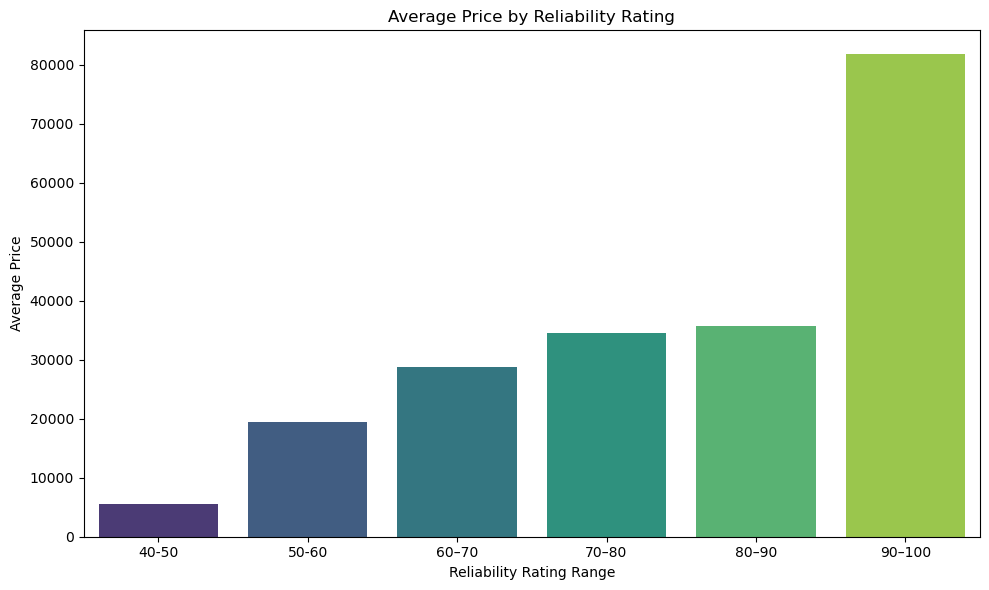

In [97]:
# Define bins focused on existing data range
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50','50-60', '60–70', '70–80', '80–90', '90–100']

# Bin the reliability scores
df['reliability_bin'] = pd.cut(df['reliability_rating'], bins=bins, labels=labels, include_lowest=True)

# Calculate average price for each bin
average_price_by_reliability = df.groupby('reliability_bin', observed=True)['price'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x='reliability_bin', y='price', data=average_price_by_reliability, hue='reliability_bin', legend=False, palette='viridis')
plt.title('Average Price by Reliability Rating')
plt.xlabel('Reliability Rating Range')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

Cars with high reliability ratings tend to be significantly more expensive.

#### Are cars with safety features less reliable?

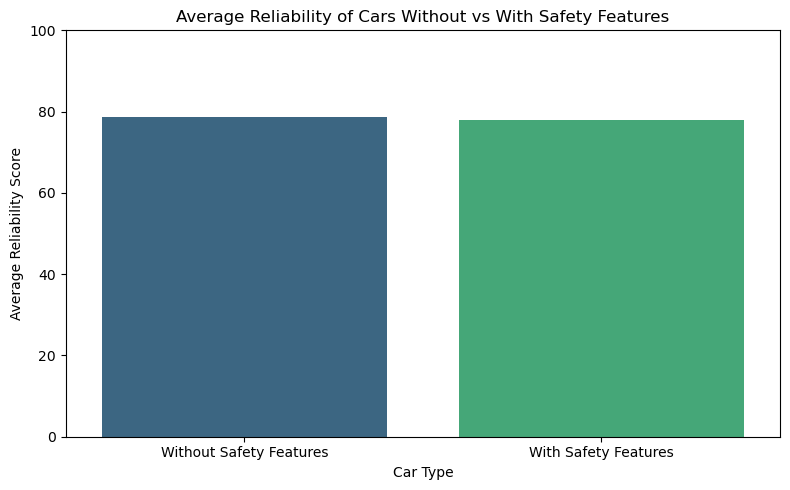

In [100]:
Safety_features = ['adaptive_cruise_control', 'stability_control', 'automatic_emergency_braking']
df['Safety_features_count'] = df[Safety_features].sum(axis=1)

# Has safety features or not
df['Has_safety_features'] = df['Safety_features_count'] > 0

# Group by whether cars have safety features and calculate average reliability
reliability_comparison = df.groupby('Has_safety_features')['reliability_rating'].mean().reset_index()

# Renaming for clarity
reliability_comparison['Has_safety_features'] = reliability_comparison['Has_safety_features'].map({True: 'With Safety Features', False: 'Without Safety Features'})

plt.figure(figsize=(8, 5))
sns.barplot(data=reliability_comparison, x='Has_safety_features', y='reliability_rating',hue='Has_safety_features', palette='viridis')
plt.title('Average Reliability of Cars Without vs With Safety Features')
plt.xlabel('Car Type')
plt.ylabel('Average Reliability Score')
plt.ylim(0, 100)  
plt.tight_layout()
plt.show()

Vehicles without safety features show significantly better reliability scores than those with.

#### Have car's reliability improved over the recent years?

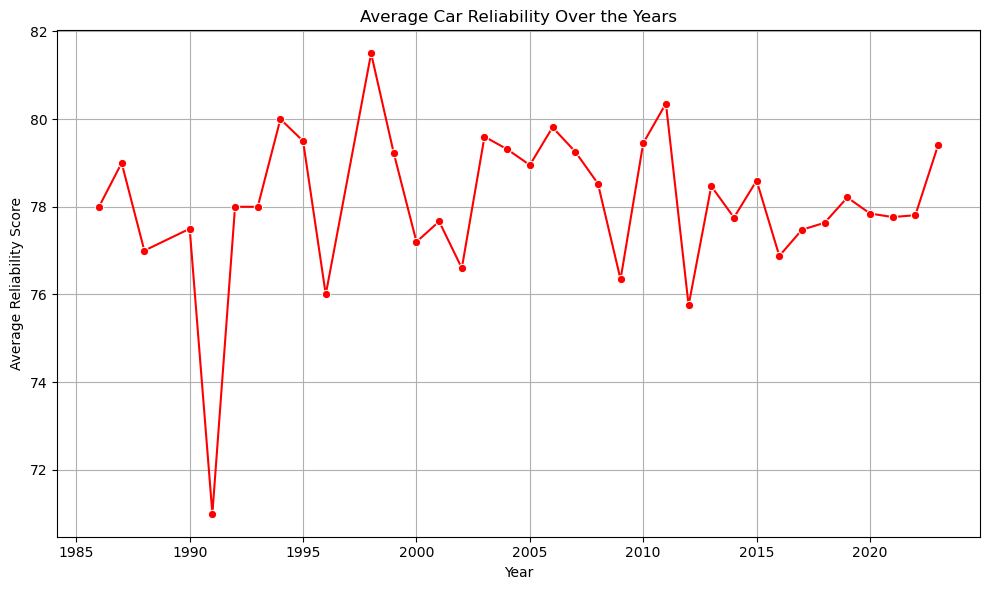

In [103]:
# Group by year and calculate average reliability
reliability_by_year = df.groupby('year')['reliability_rating'].mean().reset_index()
# Sort by year
reliability_by_year = reliability_by_year.sort_values(by='year')

plt.figure(figsize=(10, 6))
sns.lineplot(data=reliability_by_year, x='year', y='reliability_rating', marker='o', color='Red')
plt.title('Average Car Reliability Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Reliability Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Car's reliability have become more consistent and slightly improved in recent years.

#### Which car models offer the best and worst value for money between reliability and price?

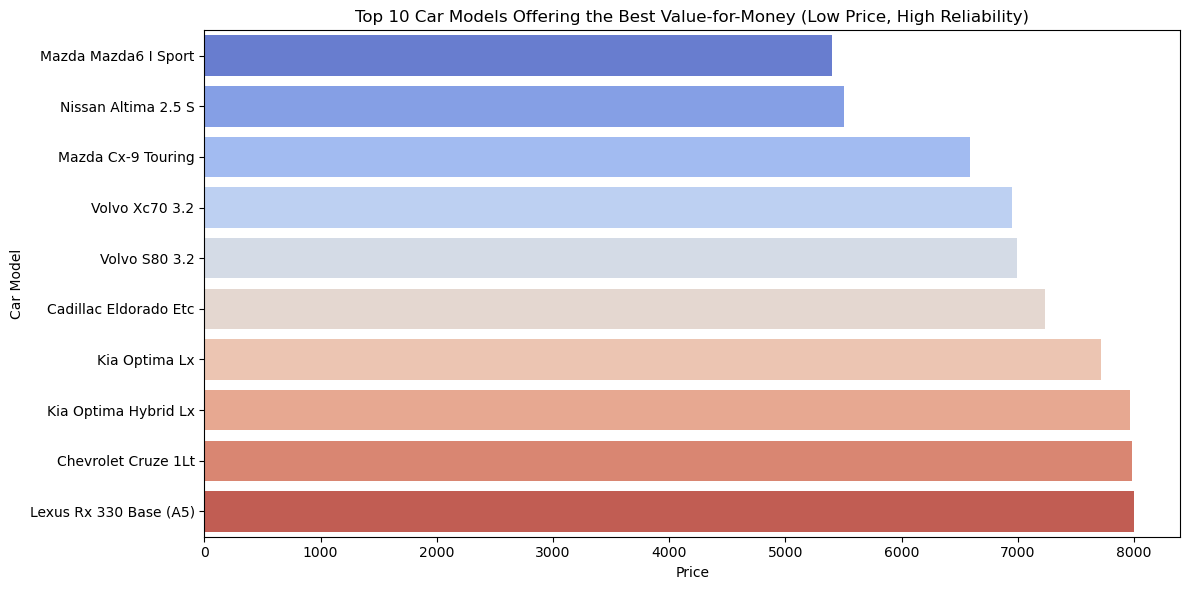

In [106]:
# Finding best value-for-money (low price and High reliability)
top_models = df[(df['reliability_rating'] > df['reliability_rating'].quantile(0.75)) & (df['price'] < df['price'].quantile(0.25))]

top_models = top_models.copy()

top_models['car'] = top_models['brand'].str.title() + ' ' + top_models['model'].str.title()

# Sorting best value-for-money cars by price
top_models = top_models.sort_values(by='price').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='price', y='car', hue='car',palette='coolwarm')
plt.xlabel('Price')
plt.ylabel('Car Model')
plt.title('Top 10 Car Models Offering the Best Value-for-Money (Low Price, High Reliability)')
plt.tight_layout()
plt.show()

Mazda's provides the best value-for-money due to its low price and high reliability.

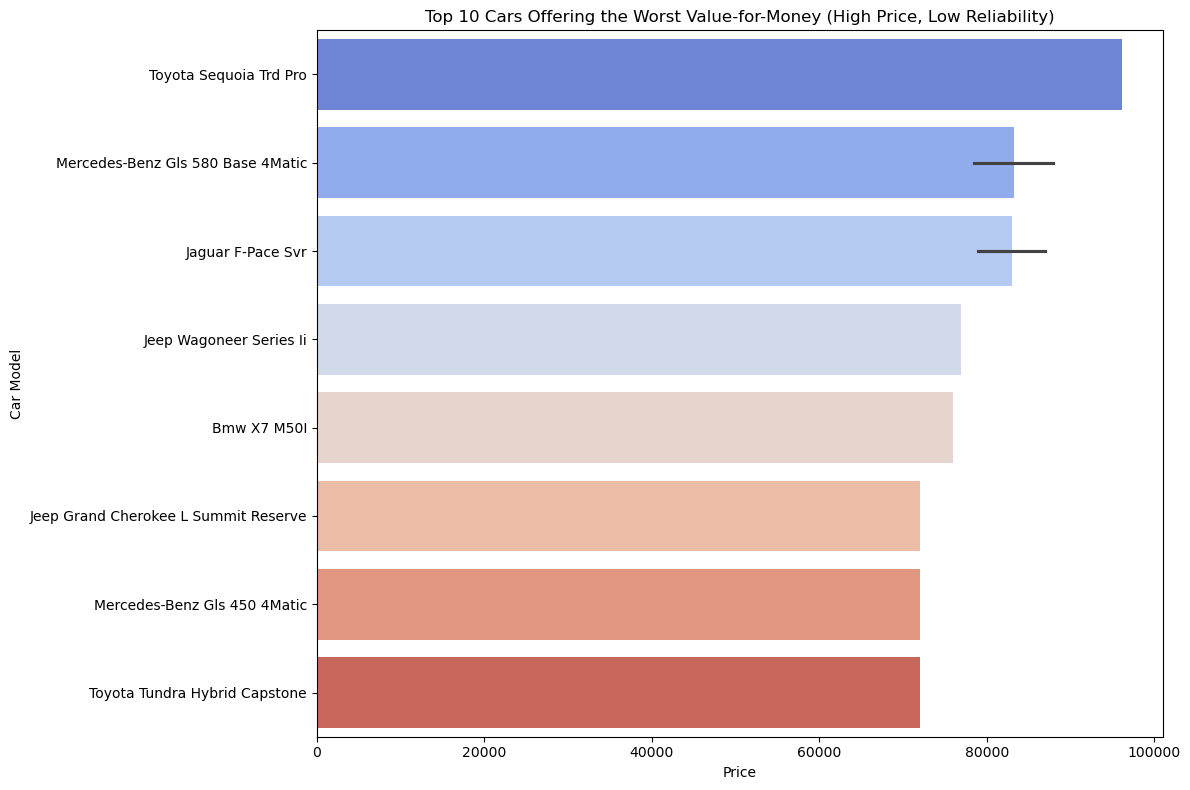

In [108]:
# Finding worst value-for-money (High price and low reliability)
worst_value = df[(df['reliability_rating'] < df['reliability_rating'].quantile(0.25)) & (df['price'] > df['price'].quantile(0.75))]

worst_value = worst_value.copy()

worst_value['car'] = worst_value['brand'].str.title() + ' ' + worst_value['model'].str.title()

plt.figure(figsize=(12, 8))

# Sorting worst value-for-money cars by price
worst_value_sorted = worst_value.sort_values(by='price', ascending=False).head(10)
sns.barplot(data=worst_value_sorted, x='price', y='car', hue='car', legend=False, palette='coolwarm')
plt.title('Top 10 Cars Offering the Worst Value-for-Money (High Price, Low Reliability)')
plt.xlabel('Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Toyota Sequoia TRD Pro, Mercedes-Benz GLS 580, and Jaguar F-Pace SVR offer's the worst value for money due to high prices and low reliability.

### General Insights 

#### What are the most common car features?(e.g., Bluetooth, heated seats, navigation)?

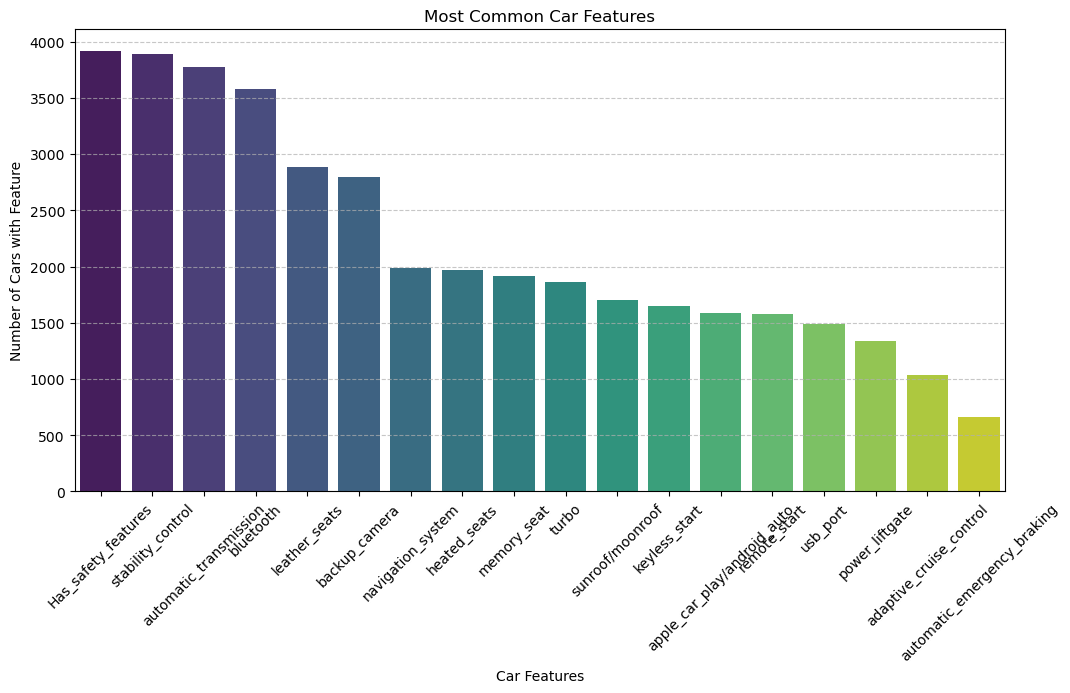

In [112]:
feature_columns = [col for col in df.columns if df[col].nunique() == 2]  

# Convert features to numeric 
for col in feature_columns:
    if df[col].dtype == 'object':  
        df[col] = df[col].map({'Yes': 1, 'No': 0, True: 1, False: 0}).fillna(0)

feature_counts = df[feature_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, hue=feature_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel("Car Features")
plt.ylabel("Number of Cars with Feature")
plt.title("Most Common Car Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Stability control, automatic transmission and bluetooth appears to be the most common features among cars.

#### Are certain brands more likely to have advanced features?

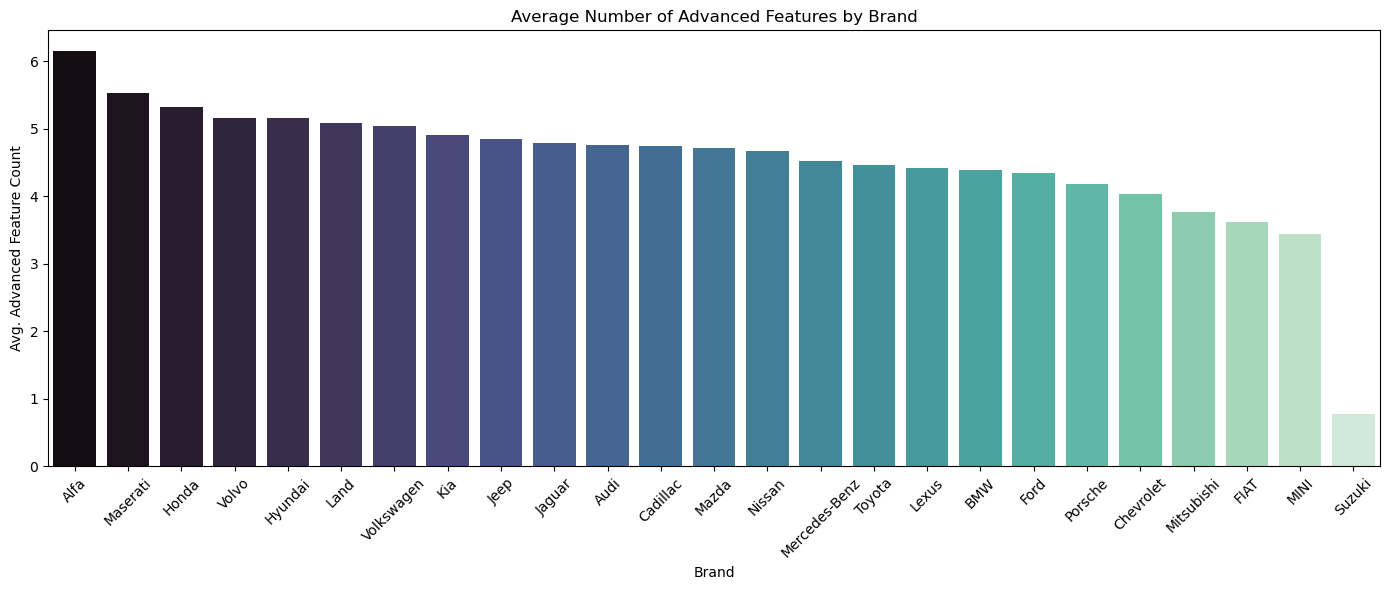

In [115]:
advanced_features = [
    'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
    'backup_camera', 'keyless_start', 'remote_start',
    'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats'
]

df['advanced_feature_count'] = df[advanced_features].sum(axis=1)

# Group by brand and calcu average feature count
brand_feature_avg = df.groupby('brand')['advanced_feature_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=brand_feature_avg, x='brand', y='advanced_feature_count',hue='brand', palette='mako')

plt.title('Average Number of Advanced Features by Brand')
plt.xlabel('Brand')
plt.ylabel('Avg. Advanced Feature Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most brands are rich in advanced features apart from Suzuki, which is due to their economically priced cars.

#### Which car brands appear more frequently in the resale market?

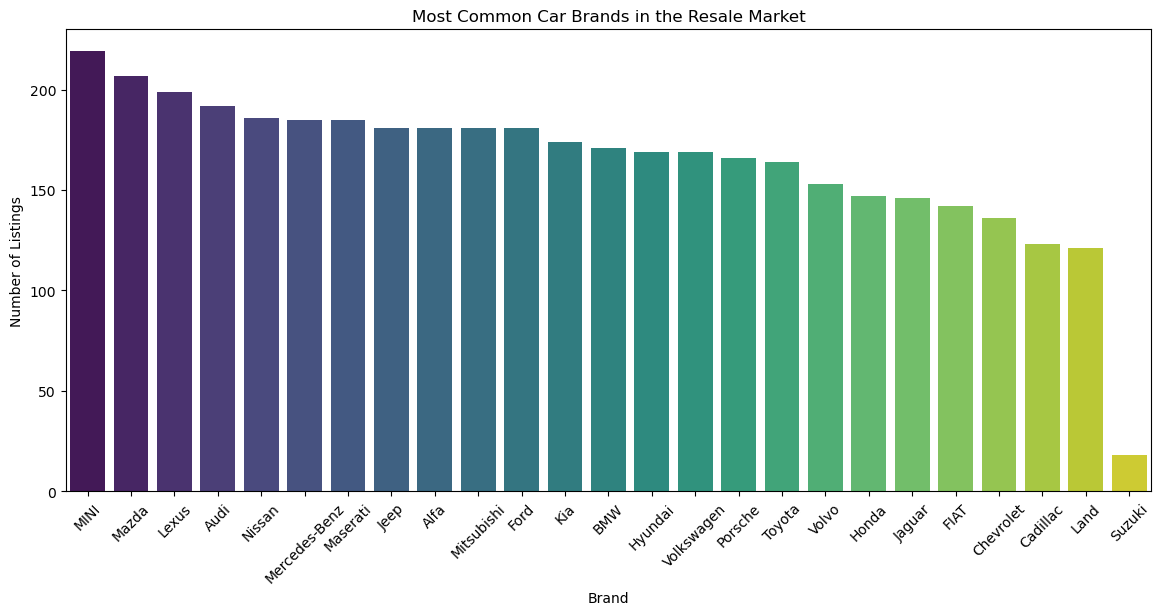

In [118]:
brand_counts = df['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

plt.figure(figsize=(14, 6))
sns.barplot(data=brand_counts, x='brand', y='count',hue='brand', palette='viridis')

plt.title('Most Common Car Brands in the Resale Market')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

plt.show()

MINI's and Mazda's dominate the resale market. That might be due to their high MPG and relatively low price compared ot other brands.

#### Is reliability a significant factor that affects price and mileage?

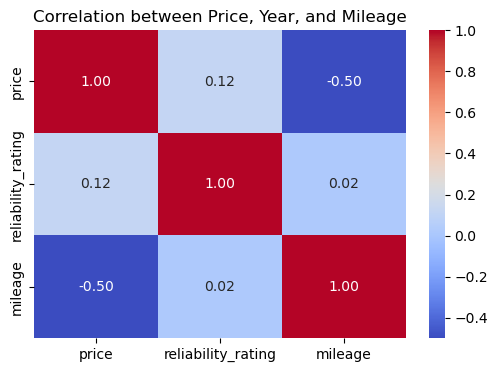

In [121]:
# Using HeatMap to display Correlation between Price, Year, and Mileage
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price', 'reliability_rating', 'mileage']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price, Year, and Mileage")
plt.show()

Reliability has a small direct relation with mileage and price.

### Hypothesis Testing

**H₀ (Null Hypothesis)**: The average price of high-reliability and low-reliability cars is the same.

**H₁ (Alternative Hypothesis)**: The average price of high-reliability cars is significantly different from low-reliability cars.

In [125]:
import scipy.stats as stats

# Define high and low reliability groups
high_rel = df[df['reliability_rating'] >= df['reliability_rating'].quantile(0.75)]['price']
low_rel = df[df['reliability_rating'] <= df['reliability_rating'].quantile(0.25)]['price']

l1 = len(high_rel)
l2 = len(low_rel)

# Group Means
x1Mean = high_rel.mean()
x2Mean = low_rel.mean()

x1var = high_rel.var(ddof=1)
x2var = low_rel.var(ddof=1)

num = (l1 - 1)*x1var + (l2 - 1)*x2var
dem = l1 + l2 - 2
part1 = num / dem
part2 = (1/l1) + (1/l2)
S = np.sqrt(part1 * part2)

tScore = (x1Mean - x2Mean) / S
print(f'T-score: {tScore}')

DegreeF = l1 + l2 - 2

alpha = 0.05
table_value = stats.t.ppf(1 - alpha, DegreeF)
print(f'Table Value (alpha=0.05): {table_value}')

# Check with scipy t-test
tscore_scipy = stats.ttest_ind(high_rel, low_rel).statistic
print(f'scipy t-test result: {tscore_scipy}')

T-score: 5.417449475429637
Table Value (alpha=0.05): 1.6454927736153582
scipy t-test result: 5.417449475429637


**Since T Score (5.417) > Table Value (1.64), We reject H0**

There is a statistically significant difference in price between high- and low-reliability vehicles, suggesting higher reliability is associated with higher prices.